## Web APIs for data
We have been loading data from files using `read_csv()` and `read_excel()`. A second way to input data to python/pandas is by directly downloading data from a web server through an *application programming interface* or api. 

The [wikipedia page](https://en.wikipedia.org/wiki/Web_API) isn't that insightful, but an api is a way to directly querry a webserver and (in our case) ask for data. An api provides several advantages
1. You only download the data you need
2. You do not need to distribute data files with your code
3. You have access to the 'freshest data'

There are downsides, to using apis, too.

1. You need to be online to retrive the data
2. The group hosting the data may 'revise' the data, making it difficult to replicate you results

On the whole, I find apis very convienent and useful. Let's dig in. 

### The packages
The package `pandas_datareader` collects functions that interact with several popular data sources to access their apis. Thes include
* Google finance
* Morningstar
* St. Louis Fed's Fred (one of my favorites)
* The World Bank
* Eurostat
* Quandl


### Installing packages with pip
We use the Anaconda distribution which bundles python with many other useful packages. pandas_datareader, however, is not one of them. 

We will install the package using 'pip' the python package manager. 
1. Open a command window (open the start menu and type: 'cmd'). 
2. Run the command `pip install --user pandas_datareader` and hit enter

That should do it. It might take a minute, and fill the command window with text, but in the end it should have installed. You will probably see a message about updating pip. We can safely ignore it.

Now that the package is installed, we can import it into our program like usual. 

In [1]:
import pandas as pd                       # pandas, shortened to pd

# If you receive an error while trying to load data_reader try uncommenting the line below
# This is/was a problem with an older version of pandas_datareader
# pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data, wb    # we are grabbing the data and wb functions from the package
import matplotlib.pyplot as plt           # for plotting
import matplotlib.dates as mdates
import datetime as dt                     # for time and date

### FRED
The FRED database is hosted by the St. Louis FRB. It house lots of economic and financial data. It is US-centric but has some international data, too. 

To use the FRED api you need to know the variable codes. The easiest way to do it to search on the [FRED website](https://fred.stlouisfed.org/).  

The pandas_datareader documentation for FRED is [here](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#fred).

In [2]:
codes = ['GDPCA', 'LFWA64TTUSA647N']  # these codes are for real US gdp and the working age poplulation
                                      # the first code seems intuitive. the second does not
    
# We have the codes. Now go get the data. The DataReader() function returns a DataFrame
# Create datetime objects for the start date. If you do not spec an end date it returns up to the most
# recent date
start = dt.datetime(1970, 1, 1)
fred = data.DataReader(codes, 'fred', start)

fred.head()


,GDPCA,LFWA64TTUSA647N
DATE,,
1970-01-01,4951.262,1.180775e+08
1971-01-01,5114.325,1.208098e+08
1972-01-01,5383.282,1.241022e+08
1973-01-01,5687.207,1.267081e+08
1974-01-01,5656.465,1.291758e+08


In [3]:
fred.columns = ['gdp', 'wap']

# Let's plot real gdp per working age person
fred['gdp_wap'] = fred['gdp']*1000000000/fred['wap']  # gdp data is in billions

fred.head()

,gdp,wap,gdp_wap
DATE,,,
1970-01-01,4951.262,1.180775e+08,41932.307171
1971-01-01,5114.325,1.208098e+08,42333.710648
1972-01-01,5383.282,1.241022e+08,43377.824454
1973-01-01,5687.207,1.267081e+08,44884.326638
1974-01-01,5656.465,1.291758e+08,43788.907748


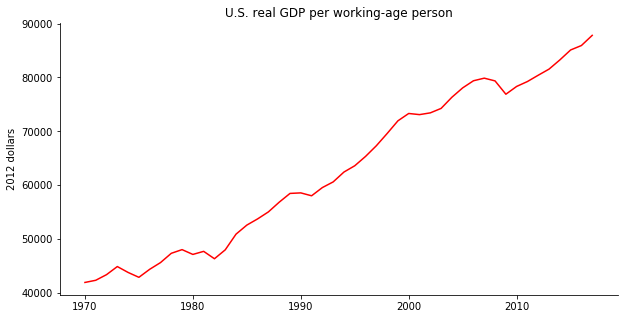

In [4]:

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(fred.index, fred['gdp_wap'], color='red')

ax.set_ylabel('2012 dollars')
ax.set_title('U.S. real GDP per working-age person')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



### Stock prices with Google Finance

The [documentation](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#google-finance) now features this warning: 

>Google’a API has become less reliable during 2017. While the google datareader often works as expected, it is not uncommon to experience a range of errors when attempting to read data, especially in bulk.

Another potential downside of apis: They can change, breaking old code. 

### Stock prices with iex

According to the [docs](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#morningstar):
>The Investors Exchange (IEX) provides a wide range of data through an API. Historical stock prices are available for up to 5 years.

In [5]:
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2018, 10, 1)

sym = 'HOG'
iex = data.DataReader(sym, 'iex', start, end)

In [6]:
iex.head()

,open,high,low,close,volume
date,,,,,
2017-01-03,55.6662,56.5481,55.5998,55.8938,1477440
2017-01-04,56.1973,56.6619,55.4860,56.5102,1637356
2017-01-05,56.2352,56.8943,55.9602,56.5671,1394753
2017-01-06,55.9507,56.5007,54.9455,56.0455,1824794
2017-01-09,56.0645,56.1323,54.8412,55.1446,3611557


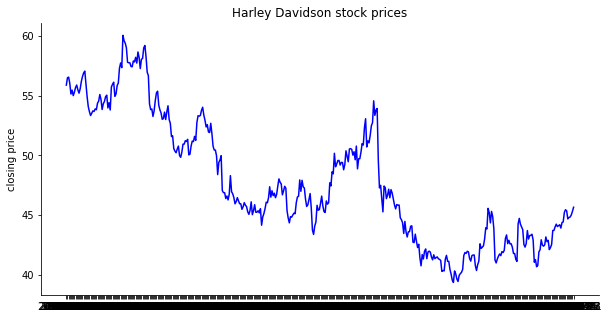

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(iex.index, iex['close'], color='blue')

ax.set_ylabel('closing price')
ax.set_title('Harley Davidson stock prices')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [8]:
# Ahhh! Not a good looking figure.

# We need to set the index to a datetime object so mpl can get the axis right...
iex.index = pd.to_datetime(iex.index)

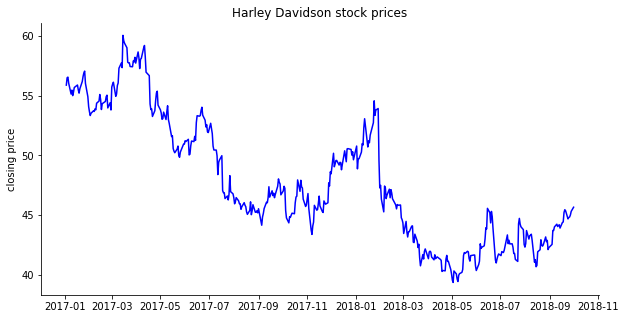

In [72]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(iex.index, iex['close'], color='blue')

ax.set_ylabel('closing price')
ax.set_title('Harley Davidson stock prices')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Practice: APIs

Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

How has inflation in the United States evolved over the last 60 years? Let's investigate.

1. Go the FRED website and find the code for the 'Consumer price index for all urban consumers: All items less food and energy' 
2. Use the api to get the data from 1960 to the most recent. 

In [9]:
fred_cpi = data.DataReader(name = "CPILFESL", 
                           data_source = "fred", 
                           start = dt.datetime(1960, 1, 1))
fred_cpi.head()

,CPILFESL
DATE,
1960-01-01,30.5
1960-02-01,30.6
1960-03-01,30.6
1960-04-01,30.6
1960-05-01,30.6


3. Create a variable in your DataFrame that hold the growth rate of the CPI --- the inflation rate. Compute it in percentage terms.

In [10]:
fred_cpi.columns = ["CPI"]
fred_cpi["growth"] = fred_cpi.CPI.pct_change() * 100
fred_cpi.head()

,CPI,growth
DATE,,
1960-01-01,30.5,NaN
1960-02-01,30.6,0.327869
1960-03-01,30.6,0.000000
1960-04-01,30.6,0.000000
1960-05-01,30.6,0.000000


4. Plot it. What patterns do you see? 

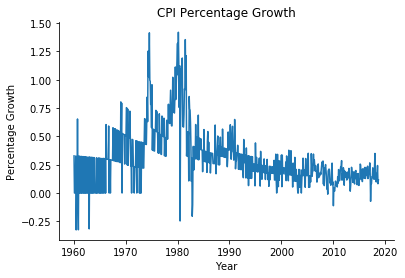

In [11]:
fig, ax = plt.subplots()
ax.plot(fred_cpi.growth)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage Growth")
ax.set_title("CPI Percentage Growth")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

5. Challenging. We computed the month-to-month inflation rate above. This is not the inflation rate we usually care about. Can you compute and plot the year-over-year inflation rate? For example, the inflation rate for 1962-05-01 would be the cpi in 1962-05-01 divided by the cpi in 1961-05-01. \[Hint: Check the documentation for `pct_change()`.

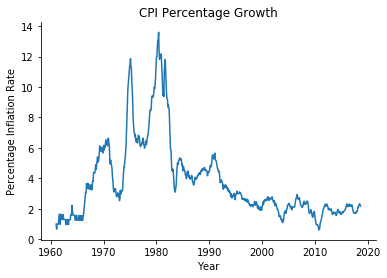

In [12]:
fred_cpi["inflation"] = fred_cpi.CPI.pct_change(periods = 12) * 100

fig, ax = plt.subplots()
ax.plot(fred_cpi.inflation)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage Inflation Rate")
ax.set_title("CPI Percentage Growth")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

6. Annotate the decrease in inflaton around 1983 as 'Volker disinflation'

Text(723546.0, 1, 'Volker disinflation')

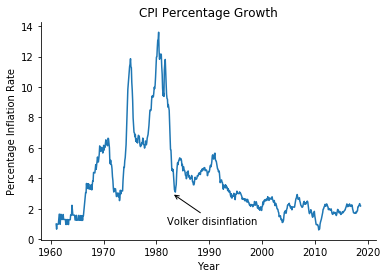

In [14]:
fig, ax = plt.subplots()
ax.plot(fred_cpi.inflation)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage Inflation Rate")
ax.set_title("CPI Percentage Growth")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.annotate(xy = (mdates.date2num(dt.datetime(1983,1,1)), 3), 
            xytext = (mdates.date2num(dt.datetime(1982,1,1)), 1), 
            text = "Volker disinflation", 
            arrowprops = dict(facecolor = 'black', arrowstyle = "->"))